 First Test 
()
Results of Dickey-Fuller Test:
Test Statistic                  0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (5%)            -3.232950
Critical Value (1%)            -4.331573
Critical Value (10%)           -2.748700
dtype: float64
 Second Test 
()
Results of KPSS Test:
Test Statistic           0.286816
p-value                  0.100000
Lags Used                9.000000
Critical Value (5%)      0.463000
Critical Value (1%)      0.739000
Critical Value (2.5%)    0.574000
Critical Value (10%)     0.347000
dtype: float64


c:\python27\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


predicted=2657.754343, expected=2590.460000
predicted=2756.717967, expected=2709.340000
predicted=2688.345695, expected=1961.680000
predicted=2490.873495, expected=2652.920000
predicted=2496.912768, expected=2020.000000
predicted=2336.858397, expected=2754.100000
predicted=2228.243622, expected=2590.170000
predicted=2655.800485, expected=2988.460000
predicted=2552.874533, expected=2978.470000
predicted=3003.915696, expected=2338.990000
predicted=2736.136844, expected=2432.960000
predicted=2683.286245, expected=2866.300000
Test RMSE: 403.416


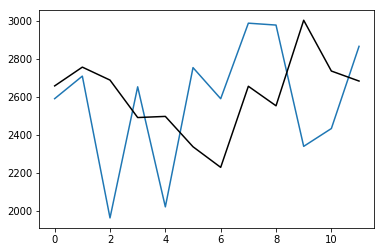

In [6]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
import numpy as np
import pandas as pd
 
def parser(x):
	return pd.datetime(x,dayfirst=True)
 
df = pd.read_csv('petrol.csv',header = 0)

df['Time'] = pd.to_datetime(df['Time'],dayfirst=True)
df.index = df['Time']
df = df.drop(columns=['Time'])
series=df

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

series=DataFrame(series)
outlier_datapoints = detect_outlier(series.Amount)
#print(outlier_datapoints)

out=set(outlier_datapoints)
out=list(out)
out=np.array(out)
n=len(out)
series=series.reset_index()
series=series.set_index('Amount')
for i in range(n):
    a=out[i]
    series=series.drop(a,axis=0)
series=series.reset_index()
series=series.set_index('Time')
#series.plot()

series=series.reset_index()
jona=pd.DataFrame(series.groupby(series['Time'].dt.strftime('%m-%y'),sort=True)['Amount'].sum().sort_index())

print(" First Test ")
print()


#ADF test

def adf_test(timeseries):
    #Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#Applying on petrol series
adf_test(jona['Amount'])

print(" Second Test ")
print()

#KPSS test

def kpss_test(timeseries):
    #define KPSS
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(jona['Amount'])


jona['diff'] = jona['Amount'] - jona['Amount'].shift(1)

X=np.array(series['Amount'])

size = int(len(X) * 0.82)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='black')
pyplot.show()

In [66]:
jona['diff']

Time
01-18        NaN
01-19   -1149.68
02-18    6091.17
03-18   -4896.89
03-19   -5074.78
04-18    7183.80
04-19   -7347.73
05-18    5107.80
05-19    3040.91
06-18      -3.17
06-19   -7869.41
07-17    5899.23
07-18    1654.48
08-17   -7390.01
08-18    5279.45
09-18   -2594.84
11-17     533.44
11-18    7265.61
12-17   -3709.12
12-18   -1673.38
Name: diff, dtype: float64

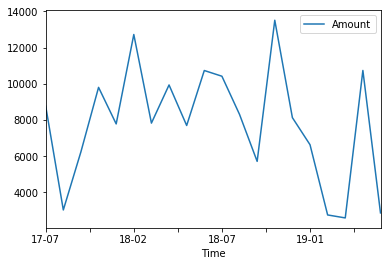